#### Emily Wang | Choose Your Own Adventure: San Francisco Crime Classification | Data Science 2016

We're working with spatial data... Do map visualization libraries exist?
* [DataMaps (javascript)](http://datamaps.github.io/)
* [Google Maps Visualization Library (javascript)](https://developers.google.com/maps/documentation/javascript/visualization)
* [Unfolding (processing and java)](http://unfoldingmaps.org/)

Alright... python tools!
* [Intro to Basemap](http://introtopython.org/visualization_earthquakes.html) 
* [Vincent](http://wrobstory.github.io/2013/04/python-maps-choropleth.html)
* [reddit question](https://www.reddit.com/r/Python/comments/1onpe2/how_to_plot_data_onto_maps_in_python/)
* [stackoverflow question](http://stackoverflow.com/questions/9018607/library-for-map-visualization)

Okay. Let's import the data and do some things with pandas, and then look into the map visualization libraries I found in this quick Google search. 

First, let's think of some helper functions that we might reuse in several notebooks... We can come back to this cell later and update it.

In [188]:
def clean_data():
    # I realize that this may be different for every iteration, 
    # and we'll figure out some way to specify which "cleaning" is desired for a particular code block. 
    return

# Normalizing the values of a column
# series.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))

def start_map():
    # Some code to help initialize a map visualization
    return

Also, importing cool tools and the data:

In [189]:
%matplotlib inline

import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pprint as pp

In [190]:
sfcrime = pandas.read_csv("./data/train.csv")
sfcrime_test = pandas.read_csv("./data/test.csv")

In [191]:
sfcrime

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802


### Descriptions for each feature

List from the [kaggle competition webpage](https://www.kaggle.com/c/sf-crime/data?test.csv.zip)

* *Dates* - timestamp of the crime incident
* *Category* - category of the crime incident (only in train.csv). This is the target variable you are going to predict.
* *Descript* - detailed description of the crime incident (only in train.csv)
* *DayOfWeek* - the day of the week
* *PdDistrict* - name of the Police Department District
* *Resolution* - how the crime incident was resolved (only in train.csv)
* *Address* - the approximate street address of the crime incident 
* *X* - Longitude
* *Y* - Latitude

### Finding the unique values for each feature

In [192]:
def print_unique_vals(feature_str):
    # Prints the unique values for a given feature. 
    # SF crime datafrme should already be loaded and ready to go in this notebook.
    for x in sfcrime[feature_str].unique():
        print x

#### Dates - timestamp of the crime incident

(Naturally) each row has a unique Date value. Not sure how well times will help with predicting the future, though. 

In [193]:
# print_unique_vals("Dates")

#### Category - category of the crime incident (only in train.csv)

This is the variable we're trying to predict in the kaggle competition. 

I am wondering how many samples we have for each category... the many categories and different amounts of data for each category will make this a tough kaggle competition. ;) 

Feature engineering thought: Maybe we can make meta-categories? (So, the model might predict the meta-category first, and then do a more "focused" prediction between the choices in that meta-category. Is there a model that works well for this high-level strategy?) 

In [194]:
print_unique_vals("Category")

WARRANTS
OTHER OFFENSES
LARCENY/THEFT
VEHICLE THEFT
VANDALISM
NON-CRIMINAL
ROBBERY
ASSAULT
WEAPON LAWS
BURGLARY
SUSPICIOUS OCC
DRUNKENNESS
FORGERY/COUNTERFEITING
DRUG/NARCOTIC
STOLEN PROPERTY
SECONDARY CODES
TRESPASS
MISSING PERSON
FRAUD
KIDNAPPING
RUNAWAY
DRIVING UNDER THE INFLUENCE
SEX OFFENSES FORCIBLE
PROSTITUTION
DISORDERLY CONDUCT
ARSON
FAMILY OFFENSES
LIQUOR LAWS
BRIBERY
EMBEZZLEMENT
SUICIDE
LOITERING
SEX OFFENSES NON FORCIBLE
EXTORTION
GAMBLING
BAD CHECKS
TREA
RECOVERED VEHICLE
PORNOGRAPHY/OBSCENE MAT


#### Descript - detailed description of the crime incident (only in train.csv)

(Naturally) each incident has a different description. This is a sneaky opportunity to practice some NLP... but Filippos and I don't want to immediately open that can of worms. We might be able to use something like indico's [text analysis APIs](https://indico.io/product) to turn these human-readable descriptions into features for our model. 

Ryan suggests doing an n-gram model on the text fields could be a good start, since the descriptions are sometimes very consistent. A quick scan through the unique values of `Descript` show how these descriptions are a handful of comma-separated phrases and not complete sentences; there may already be some structure that we can process easily wtihout worrying about heavy-duty NLP.the day of the week.

The meta-category idea could also make sense here.

In [195]:
print_unique_vals("Descript")

WARRANT ARREST
TRAFFIC VIOLATION ARREST
GRAND THEFT FROM LOCKED AUTO
GRAND THEFT FROM UNLOCKED AUTO
STOLEN AUTOMOBILE
PETTY THEFT FROM LOCKED AUTO
MISCELLANEOUS INVESTIGATION
MALICIOUS MISCHIEF, VANDALISM OF VEHICLES
FOUND PROPERTY
ROBBERY, ARMED WITH A KNIFE
AGGRAVATED ASSAULT WITH BODILY FORCE
TRAFFIC VIOLATION
ROBBERY, BODILY FORCE
STAY AWAY OR COURT ORDER, NON-DV RELATED
LOST PROPERTY
ATTEMPTED THEFT FROM LOCKED VEHICLE
CIVIL SIDEWALKS, CITATION
MALICIOUS MISCHIEF, VANDALISM
SUSPICIOUS PACKAGE
AIDED CASE, MENTAL DISTURBED
PETTY THEFT SHOPLIFTING
PROBATION VIOLATION
STAY AWAY ORDER VIOLATION, DV RELATED
DRIVERS LICENSE, SUSPENDED OR REVOKED
STOLEN MOTORCYCLE
GRAND THEFT FROM PERSON
BURGLARY, VEHICLE (ARREST MADE)
ATTEMPTED ROBBERY ON THE STREET WITH BODILY FORCE
PETTY THEFT FROM A BUILDING
INVESTIGATIVE DETENTION
GRAND THEFT OF PROPERTY
STOLEN AND RECOVERED VEHICLE
UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE
ENROUTE TO PAROLE OFFICER
ENROUTE TO OUTSIDE JURISDICTION
EXHIBITING DEADL

#### DayOfWeek - the day of the week

Crime happens every day of the week in this dataset -- maybe we can plot some histograms to see if there are significant trends between day and categories. We should definitely normalize the frequencies to make fair comparisons if there are different amounts of samples for each category!!

In [196]:
print_unique_vals("DayOfWeek")

Wednesday
Tuesday
Monday
Sunday
Saturday
Friday
Thursday


#### PdDistrict - name of the Police Department District

This is where some context about San Francisco could be helpful -- I found myself immediately making the assumption that primarily police from the corresponding department district will handle crimes in that district... but maybe sometimes police from other districts get involved. 

In [197]:
print_unique_vals("PdDistrict")

NORTHERN
PARK
INGLESIDE
BAYVIEW
RICHMOND
CENTRAL
TARAVAL
TENDERLOIN
MISSION
SOUTHERN


#### Resolution - how the crime incident was resolved (only in train.csv)

There must be some way to rank the resolution in order of intensity -- and this intensity rating (i.e. more intense resolutions have higher intesity scores) could be more useful to the model rather than word categories. 

In [198]:
print_unique_vals("Resolution")

ARREST, BOOKED
NONE
ARREST, CITED
PSYCHOPATHIC CASE
JUVENILE BOOKED
UNFOUNDED
EXCEPTIONAL CLEARANCE
LOCATED
CLEARED-CONTACT JUVENILE FOR MORE INFO
NOT PROSECUTED
JUVENILE DIVERTED
COMPLAINANT REFUSES TO PROSECUTE
JUVENILE ADMONISHED
JUVENILE CITED
DISTRICT ATTORNEY REFUSES TO PROSECUTE
PROSECUTED BY OUTSIDE AGENCY
PROSECUTED FOR LESSER OFFENSE


#### Address - the approximate street address of the crime incident 

I'm wondering if there are any significant trends in streets within departments/regions -- do all the streets within a particular department tend to have the same "crime level" or are there obvious streets that are the worst of the city? What if it's different based on what part of the street you are on? This is when a map-based visualization could be helpful. 

In [199]:
print_unique_vals("Address")

OAK ST / LAGUNA ST
VANNESS AV / GREENWICH ST
1500 Block of LOMBARD ST
100 Block of BRODERICK ST
0 Block of TEDDY AV
AVALON AV / PERU AV
KIRKWOOD AV / DONAHUE ST
600 Block of 47TH AV
JEFFERSON ST / LEAVENWORTH ST
0 Block of ESCOLTA WY
TURK ST / JONES ST
FILLMORE ST / GEARY BL
200 Block of WILLIAMS AV
0 Block of MENDELL ST
EDDY ST / JONES ST
GODEUS ST / MISSION ST
MENDELL ST / HUDSON AV
100 Block of JONES ST
200 Block of EVELYN WY
1600 Block of VALENCIA ST
FILLMORE ST / LOMBARD ST
300 Block of OFARRELL ST
2000 Block of BUSH ST
500 Block of COLLEGE AV
19TH AV / SANTIAGO ST
2000 Block of 41ST AV
1300 Block of WEBSTER ST
400 Block of CASTRO ST
1500 Block of FILLMORE ST
1600 Block of WEBSTER ST
KING ST / 3RD ST
VALLEJO ST / BUCHANAN ST
CALIFORNIA ST / BUCHANAN ST
1400 Block of HOLLOWAY AV
0 Block of WINDING WY
700 Block of MARKET ST
1600 Block of MARKET ST
0 Block of STOCKTON ST
300 Block of WILLIAMS AV
800 Block of LEAVENWORTH ST
0 Block of CRESCENT AV
LINCOLN WY / 14TH AV
SUTTER ST / POWEL

#### X - Longitude

X and Y might be better digested in a map-based visualization. Or maybe there's a particular X or Y value that is relatively bad or good?

In [200]:
print_unique_vals("X")

-122.425891675
-122.424363021
-122.426995327
-122.438737623
-122.403252361
-122.423326977
-122.371274317
-122.508194031
-122.419087677
-122.487983073
-122.412414264
-122.432914603
-122.397744427
-122.383691504
-122.412597377
-122.421681532
-122.38640087
-122.412249768
-122.449389111
-122.420272135
-122.436049204
-122.410509259
-122.431017557
-122.423656343
-122.475773498
-122.499787121
-122.431046366
-122.4351501
-122.432743823
-122.431309541
-122.391845617
-122.431830724
-122.43055178
-122.47318203
-122.432446463
-122.405294845
-122.42212758
-122.406351834
-122.399443659
-122.415212031
-122.423702325
-122.471799827
-122.408597387
-122.447761122
-122.39869559
-122.403284843
-122.397615568
-122.420347209
-122.399802146
-122.421395819
-122.41127919
-122.427991152
-122.400719786
-122.412928955
-122.395097774
-122.411636622
-122.474899152
-122.416235852
-122.395985971
-122.434121356
-122.397136217
-122.422572334
-122.406958661
-122.419676616
-122.442496488
-122.396411456
-122.413591696
-12

#### Y - Latitude

(same comments as X - Longitude): X and Y might be better digested in a map-based visualization. Or maybe there's a particular X or Y value that is relatively bad or good?

In [201]:
print_unique_vals("Y")

37.7745985957
37.800414322
37.8008726328
37.7715411721
37.7134307041
37.7251380404
37.727564072
37.7766012607
37.8078015517
37.7376666543
37.7830037965
37.7843533427
37.7299346936
37.743189042
37.7839320277
37.7428222005
37.7389834911
37.7825563302
37.7426688026
37.7473316299
37.7998412229
37.7860432223
37.7873880712
37.7325564882
37.7449190696
37.7485176035
37.7830295716
37.7617597244
37.7838424506
37.7858706273
37.7781247783
37.7956417033
37.7893227716
37.7215647406
37.7108326541
37.7863072236
37.7730330184
37.7860311576
37.7301760162
37.7888714498
37.7352327878
37.7656866988
37.7892242059
37.7698464875
37.7547456011
37.787306416
37.7773918243
37.7717690722
37.7880065324
37.7856843389
37.7715785765
37.7849531242
37.7907124696
37.7896868266
37.7940590486
37.7717869351
37.726990531
37.7849125738
37.7788348206
37.7860330497
37.7228049825
37.748774005
37.789434763
37.7658510977
37.7604858807
37.7791876147
37.7638222259
37.7975048898
37.7946028272
37.7817569848
37.747785907
37.7791621676


### Somewhat overwhelmed by time

I'm pretty overwhelmed by how any visualization of variables that I can think of (e.g. day of week vs. category) can then be followed by "...does that hold true for every year between 2003 and 2015??" I think for now I will try to plot things by year; let's see how many samples we have per year of data.

I'm using bar charts because I am plotting the independent variable as categories (year 2003, year 2004, year 2005, ..., up to year 2015) rather than some continuous quantity (occurrences between years 2003-2005, 2005-2007, etc). 

In [202]:
# NEW FEATURE: Year
sfcrime["Year"] = sfcrime["Dates"].apply(lambda x: x.split(" ")[0].split("-")[0])

# NEW FEATURE: Month
sfcrime["Month"] = sfcrime["Dates"].apply(lambda x: x.split(" ")[0].split("-")[1])

In [203]:
# x = sfcrime["Year"].unique()
# y = sfcrime["Year"].value_counts()
# y_normalized = y.apply(lambda x: (x - np.mean(y)) / (np.max(y) - np.min(y)))
# sns.barplot(x, y_normalized)
# sns.axlabel("Year", "Counts (normalized)")

2015 has waaaaay less data than all of the other years.

In [204]:
# # Making this bar plot code into a reusable function ^_^
# def auto_barplot(xstr, rotate=False, theta=30, normalize=True):
#     x = sfcrime[xstr].unique()
#     y = sfcrime[xstr].value_counts()
#     y_normalized = y.apply(lambda x: (x - np.mean(y)) / (np.max(y) - np.min(y)))
#     if normalize:
#         fig = sns.barplot(x, y_normalized)
#         sns.axlabel(xstr, "Counts (normalized)")
#     else: # in case the non-normalized values are desired because they can be more human readable 
#         fig = sns.barplot(x, y)
#         sns.axlabel(xstr, "Counts")
#     if rotate:
#         fig.set_xticklabels(x, rotation=theta)

In [205]:
# auto_barplot("Month")

In [206]:
# auto_barplot("Category", rotate=True, theta=90)

### TODO:
* Commentary for the bar plots above
* Ryan also brought up this idea: "you could cluster data points, and investigate time properties of the clusters.
Then you could see, for these samples that look similar, is there commonality in years that this happens?  Is there commonality in the month or season it happens?" [unsupervised learning clusters]
* Weekday vs. Counts for each category (so, a grid of figures)
* Histograms of resolutions and PdDistrict
* Script of reusable helper functions
* Read up on a map visualization library
* And more!

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

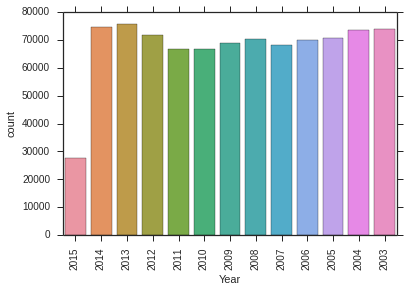

In [207]:
fig = sns.countplot(x="Year", data=sfcrime)
plt.xticks(rotation=90)

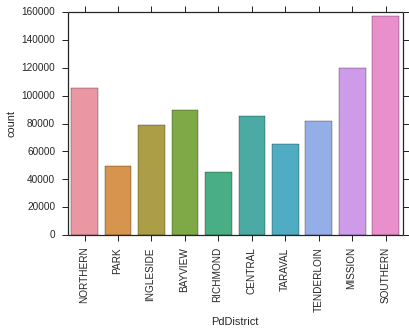

In [208]:
fig = sns.countplot(x="PdDistrict", data=sfcrime)
fig = plt.xticks(rotation=90)

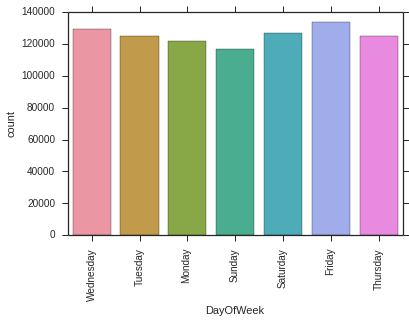

In [209]:
fig = sns.countplot(x="DayOfWeek", data=sfcrime)
fig = plt.xticks(rotation=90)

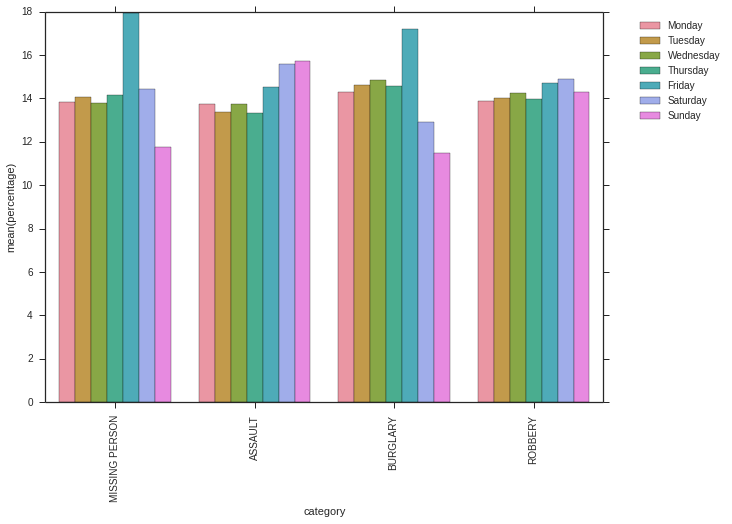

In [210]:
# cat_subset = sfcrime["Category"].unique()[0:4]
cat_subset = ["ASSAULT", "BURGLARY", "MISSING PERSON", "ROBBERY"]

grouped = sfcrime.groupby(['Category'], sort=False)

weekday_counts = grouped['DayOfWeek'].value_counts(normalize=True, sort=False)

weekday_data = [
    {'category': category, 'DayOfWeek': DayOfWeek, 'percentage': percentage*100} 
    for (category, DayOfWeek), percentage in dict(weekday_counts).items() if category in cat_subset
]

df_weekday = pd.DataFrame(weekday_data)
weekdaystr = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

p = plt.figure(figsize=(10,7))
p = sns.barplot(x='category', y='percentage', hue='DayOfWeek', data=df_weekday, hue_order=weekdaystr)
_ = plt.setp(p.get_xticklabels(), rotation=90) 
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

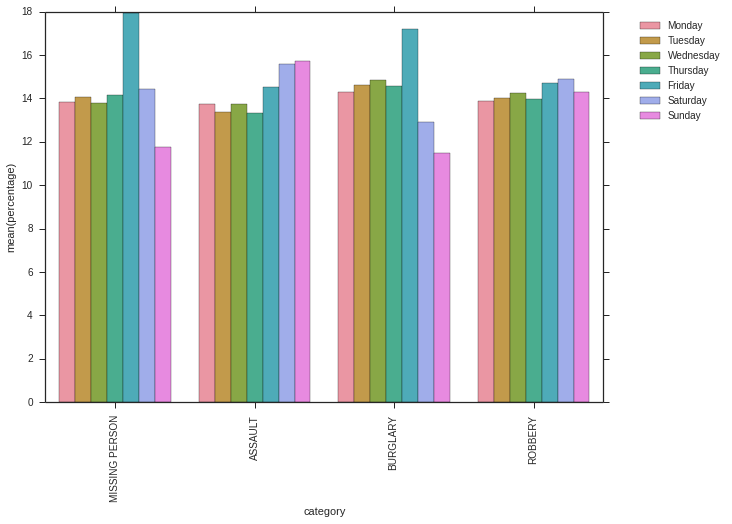

In [211]:
# cat_subset = sfcrime["Category"].unique()[0:4]
cat_subset = ["ASSAULT", "BURGLARY", "MISSING PERSON", "ROBBERY"]
yfeature = 'DayOfWeek'

def normalized_barplots(cat_subset):
    grouped = sfcrime.groupby(['Category'], sort=False)

    weekday_counts = grouped['DayOfWeek'].value_counts(normalize=True, sort=False)

    weekday_data = [
        {'category': category, 'DayOfWeek': DayOfWeek, 'percentage': percentage*100} 
        for (category, DayOfWeek), percentage in dict(weekday_counts).items() if category in cat_subset
    ]

    df_weekday = pd.DataFrame(weekday_data)
    weekdaystr = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    p = plt.figure(figsize=(10,7))
    p = sns.barplot(x='category', y='percentage', hue='DayOfWeek', data=df_weekday, hue_order=weekdaystr)
    _ = plt.setp(p.get_xticklabels(), rotation=90) 
    _ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
    
normalized_barplots(cat_subset)